### **Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### **Importing dataset and creating dataframe**

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

**Observation** There are 768 rows and 9 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### **Handling null values**

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values

### **Handling duplicates**

In [7]:
df.duplicated().sum()

0

There are no duplicate values in the dataset

**These parameters cannot be zero**
1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI
<br>


In [8]:
print(f'Number of zeros in Glucose : {df[df["Glucose"] == 0]["Glucose"].count()}')
print(f'Number of zeros in BloodPressure : {df[df["BloodPressure"] == 0]["BloodPressure"].count()}')
print(f'Number of zeros in SkinThickness : {df[df["SkinThickness"] == 0]["SkinThickness"].count()}')
print(f'Number of zeros in Insulin : {df[df["Insulin"] == 0]["Insulin"].count()}')
print(f'Number of zeros in BMI : {df[df["BMI"] == 0]["BMI"].count()}')

Number of zeros in Glucose : 5
Number of zeros in BloodPressure : 35
Number of zeros in SkinThickness : 227
Number of zeros in Insulin : 374
Number of zeros in BMI : 11


**We need to replace all zeros with mean of the column**

In [9]:
df['Glucose'].replace(0, df['Glucose'].mean(), inplace = True)
df['BloodPressure'].replace(0, df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].replace(0, df['SkinThickness'].mean(), inplace = True)
df['Insulin'].replace(0, df['Insulin'].mean(), inplace = True)
df['BMI'].replace(0, df['BMI'].mean(), inplace = True)

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


### **Basic EDA**

In [11]:
# function to plot histogram and boxplot 

def plot_hist_box(data, column) :
    plt.figure(figsize = (12, 4))

    plt.subplot(1,2,1)
    sns.histplot(data = data, x = column, kde = True)

    plt.subplot(1,2,2)
    sns.boxplot(data = data, x = column)

    plt.show()

In [12]:
# function to find out number and percentage of outliers
 
def number_of_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    num_out = data[(data[column] > upper_limit) | (data[column] < lower_limit)][column].count()
    print(f'Number of outliers in {column} column : {num_out}')
    print(f'% : {round(100 * num_out / df[column].shape[0], 2)}')

In [13]:
# function to remove outliers 

def delete_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    return data[(data[column] < upper_limit) & (data[column] > lower_limit)]

In [14]:
#function to handle outliers

def handling_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    data[column].loc[data[column] >= upper_limit] = upper_limit
    data[column].loc[data[column] <= lower_limit] = lower_limit

**pregnancies**

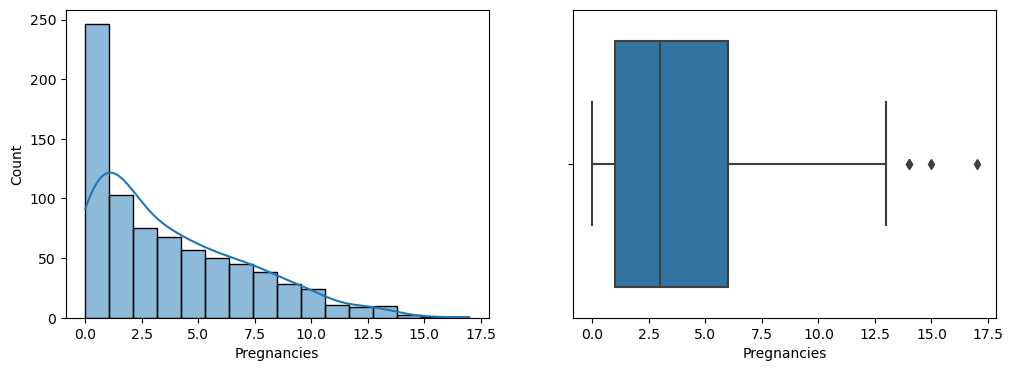

In [15]:
plot_hist_box(df, 'Pregnancies')

In [16]:
number_of_outliers(df, 'Pregnancies')

Number of outliers in Pregnancies column : 4
% : 0.52


**observation**
1. Pregnancies data show a clear left bias 
2. most data points are of pregnancies 0,1,2,3,3 etc.

**deleting outliers**

In [17]:
df = delete_outliers(df, 'Pregnancies')

**Pregnanacies vs diabetes**

In [18]:
diabetes_vs_pregnancies = df.groupby('Outcome')['Pregnancies'].mean().reset_index()
diabetes_vs_pregnancies

,Outcome,Pregnancies
0,0,3.298000
1,1,4.712121


**Glucose**

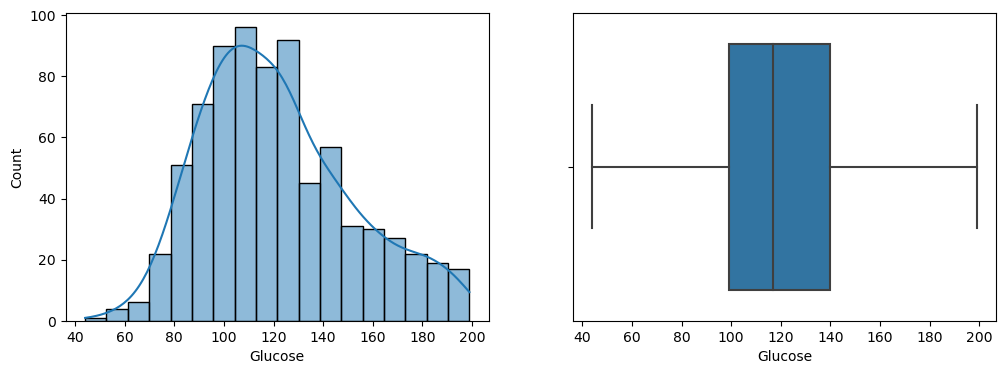

In [19]:
plot_hist_box(df, 'Glucose')

**observation**
1. Clearly there are no outliers
2. Glucose is following normal distribution very closely

**glucose vs diabetes**

In [20]:
gluc_vs_diab = df.groupby('Outcome')['Glucose'].mean().reset_index()
gluc_vs_diab

,Outcome,Glucose
0,0,110.705367
1,1,142.139353


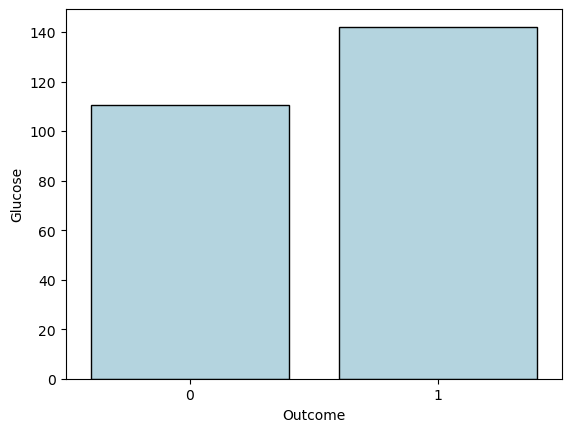

In [21]:
sns.barplot(data = gluc_vs_diab, x = 'Outcome', y = 'Glucose', color = 'lightblue', edgecolor = 'black')
plt.show()

**obsevation**
1. Glucose level on average is grater for diabetes people than non-diabetes people as expected.

**BloodPressure**

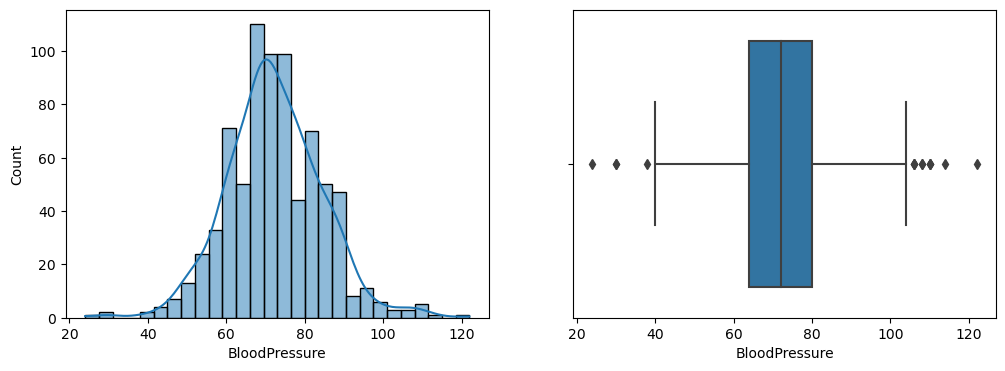

In [22]:
plot_hist_box(df, 'BloodPressure')

In [23]:
number_of_outliers(df, 'BloodPressure')

Number of outliers in BloodPressure column : 14
% : 1.83


**Removing Outliers**

In [24]:
df = delete_outliers(df, 'BloodPressure')

In [25]:
bp_vs_diabetes = df.groupby('Outcome')['BloodPressure'].mean().reset_index()
bp_vs_diabetes

,Outcome,BloodPressure
0,0,70.652447
1,1,74.426225


**observation**
1. Avg blood pressure for diabetic people in higher than non diabetes as expected.

**SkinThickness**

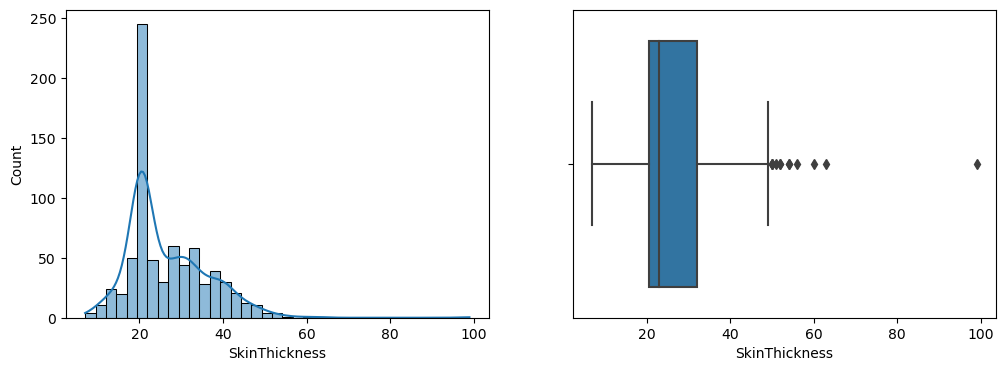

In [26]:
plot_hist_box(df, 'SkinThickness')

In [27]:
number_of_outliers(df, 'SkinThickness')

Number of outliers in SkinThickness column : 12
% : 1.61


In [28]:
skinthickness_vs_diabetes = df.groupby('Outcome')['SkinThickness'].mean().reset_index()
skinthickness_vs_diabetes

,Outcome,SkinThickness
0,0,25.364827
1,1,28.782741


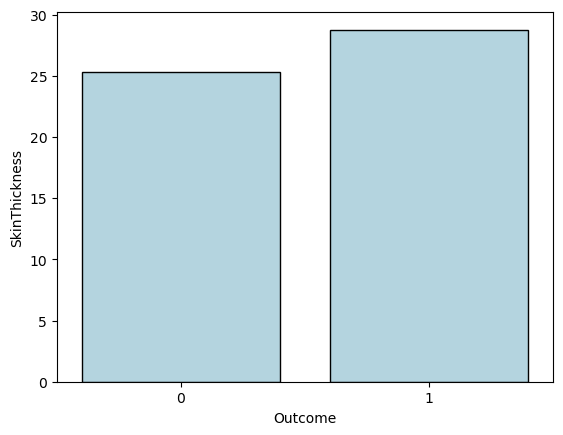

In [29]:
sns.barplot(data = skinthickness_vs_diabetes, y = 'SkinThickness', x = 'Outcome', color = 'lightblue', edgecolor = 'black')
plt.show()

**Removing Outliers**

In [30]:
df = delete_outliers(df, 'SkinThickness')

**Insulin**

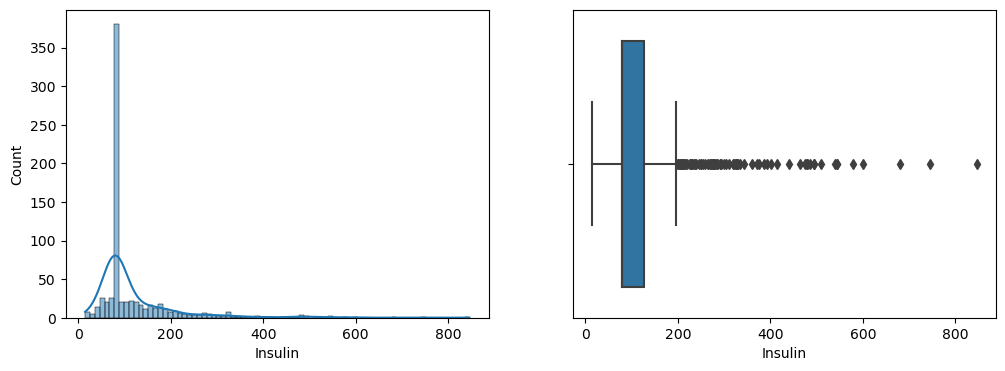

In [31]:
plot_hist_box(df, 'Insulin')

In [32]:
number_of_outliers(df, 'Insulin')

Number of outliers in Insulin column : 85
% : 11.56


**Observation**
1. There are considerable number of outliers
2. These many number of outliers cannot be ignored

**Handling Outliers**

In [33]:
handling_outliers(df, 'Insulin')

In [34]:
number_of_outliers(df, 'Insulin')

Number of outliers in Insulin column : 0
% : 0.0


**Insulin vs diabetes**

In [35]:
insulin_vs_diabetes = df.groupby('Outcome')['Insulin'].mean().reset_index()
insulin_vs_diabetes

,Outcome,Insulin
0,0,97.169343
1,1,117.333728


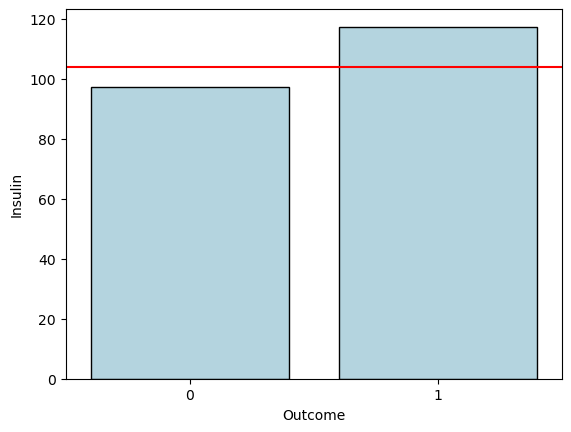

In [36]:
sns.barplot(data = insulin_vs_diabetes, x = 'Outcome', y = 'Insulin', color = 'lightblue', edgecolor = 'black')
plt.axhline(y = df['Insulin'].mean(), color = 'red')
plt.show()

**BMI**

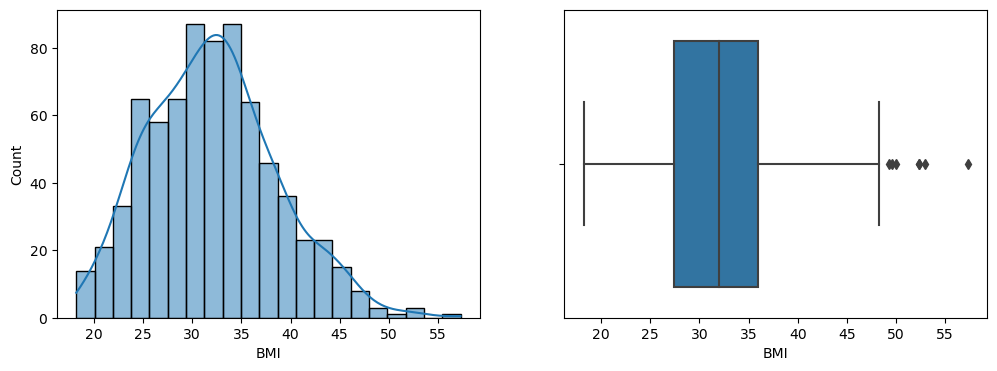

In [37]:
plot_hist_box(df, 'BMI')

In [38]:
number_of_outliers(df, 'BMI')

Number of outliers in BMI column : 7
% : 0.95


**Removing outliers**

In [39]:
df = delete_outliers(df, 'BMI')

In [40]:
df.shape

(728, 9)

**BMI vs diabetes**

In [41]:
bmi_vs_diabetes = df.groupby('Outcome')['BMI'].mean().reset_index()
bmi_vs_diabetes

,Outcome,BMI
0,0,30.609198
1,1,34.437338


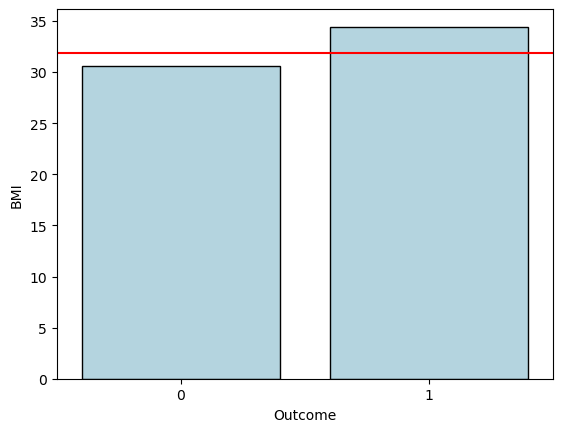

In [42]:
sns.barplot(data = bmi_vs_diabetes, x = 'Outcome', y = 'BMI', color = 'lightblue', edgecolor = 'black')
plt.axhline(y = df['BMI'].mean(), color = 'red')
plt.show()

**DiabetesPedigreeFunction**

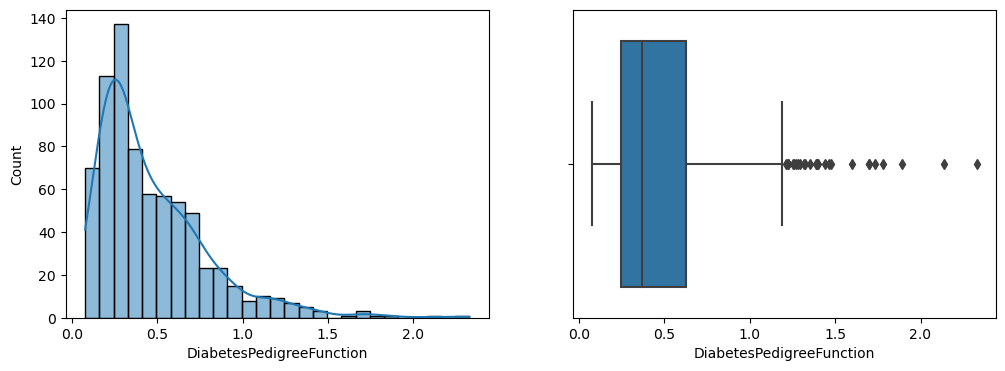

In [43]:
plot_hist_box(df, 'DiabetesPedigreeFunction')

In [44]:
number_of_outliers(df, 'DiabetesPedigreeFunction')

Number of outliers in DiabetesPedigreeFunction column : 27
% : 3.71


In [45]:
df = delete_outliers(df, 'DiabetesPedigreeFunction')

In [46]:
df.shape

(701, 9)

**Finding Correlation**

In [47]:
corr = df.corr()

In [48]:
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.132677,0.213772,0.068007,-0.009452,0.044855,0.019423,0.535162,0.224375
Glucose,0.132677,1.000000,0.196322,0.130365,0.420318,0.203736,0.093157,0.272873,0.494202
BloodPressure,0.213772,0.196322,1.000000,0.140549,0.018034,0.258247,0.039035,0.338597,0.155047
SkinThickness,0.068007,0.130365,0.140549,1.000000,0.324100,0.528856,0.117530,0.033014,0.161128
Insulin,-0.009452,0.420318,0.018034,0.324100,1.000000,0.241048,0.195062,0.042819,0.212700
BMI,0.044855,0.203736,0.258247,0.528856,0.241048,1.000000,0.140378,0.041341,0.285051
DiabetesPedigreeFunction,0.019423,0.093157,0.039035,0.117530,0.195062,0.140378,1.000000,0.062521,0.177804
Age,0.535162,0.272873,0.338597,0.033014,0.042819,0.041341,0.062521,1.000000,0.242953
Outcome,0.224375,0.494202,0.155047,0.161128,0.212700,0.285051,0.177804,0.242953,1.000000


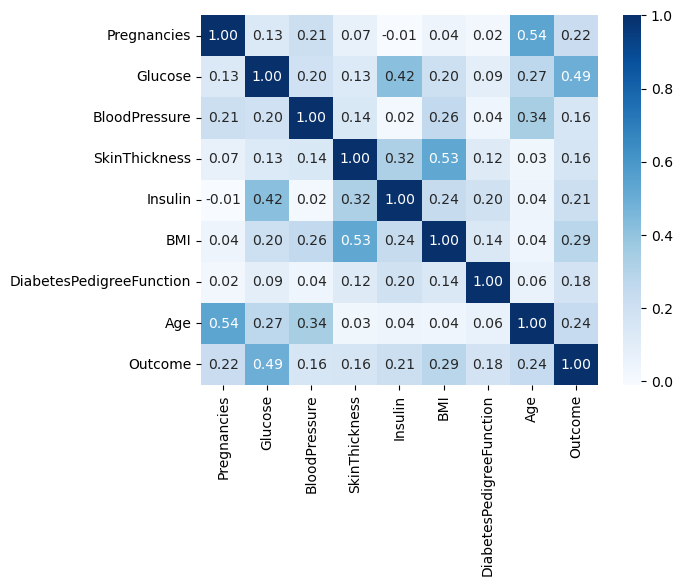

In [49]:
sns.heatmap(corr, cmap = 'Blues', annot = True, fmt = '.2f')
plt.show()

**Separating target variable from remaining data**

In [50]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [51]:
X.shape

(701, 8)

In [52]:
y.shape

(701,)

**Data Scaling**

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
sc = StandardScaler()

In [55]:
X = pd.DataFrame(sc.fit_transform(X))

In [56]:
X.columns = df.columns.to_list()[0:-1]

In [57]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.676497,0.923669,0.032098,1.063404,-0.511136,0.279767,0.785796,1.434022
1,-0.871233,-1.199639,-0.527122,0.365325,-0.511136,-0.841015,-0.316058,-0.178451
2,1.295590,2.103285,-0.713528,-0.619378,-0.511136,-1.369383,0.965446,-0.093584
3,-0.871233,-1.064826,-0.527122,-0.332753,-0.204938,-0.600847,-1.050626,-1.027121
4,0.366951,-0.154837,0.218504,-0.619378,-0.511136,-1.001126,-0.914891,-0.263318


**Train test split**

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(467, 8)
(234, 8)
(467,)
(234,)


In [60]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = {}
train_scores = {}

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    
    test_scores[i] = knn.score(X_test,y_test)
    
    train_scores[i] = knn.score(X_train,y_train)

In [61]:
def best_scores(scores):
    for i in test_scores:
        if test_scores[i] == max(test_scores.values()):
            return i, round(test_scores[i],2)

In [62]:
score = best_scores(test_scores)

In [63]:
print(f'Best test scores : {score[1]} for k : {score[0]}')

Best test scores : 0.78 for k : 13


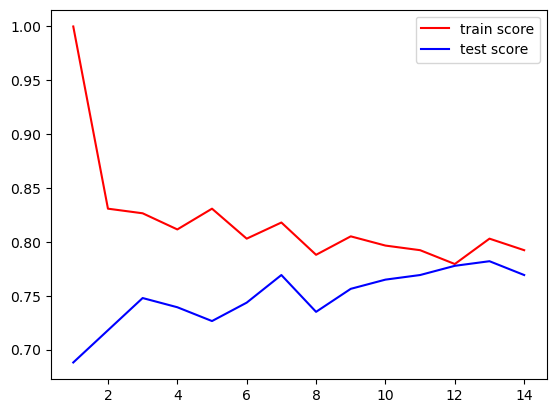

In [64]:
sns.lineplot(x = train_scores.keys(), y = train_scores.values(), color = 'red', label = 'train score')
sns.lineplot(x = test_scores.keys(), y = test_scores.values(), color = 'blue', label = 'test score')
plt.show()

**Building KNN model with k = 13**

In [65]:
knn = KNeighborsClassifier(13)
m = knn.fit(X_train, y_train)

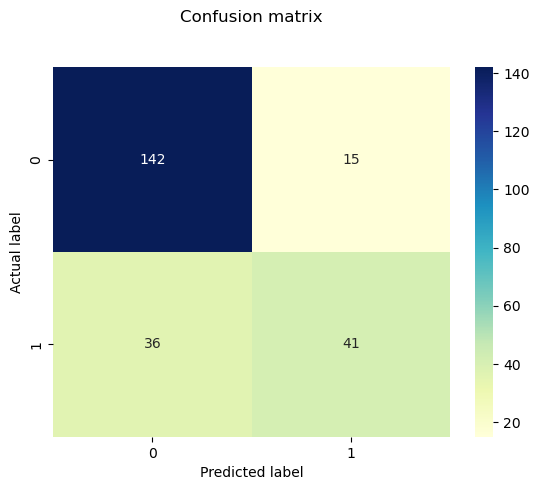

In [66]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [67]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.73      0.53      0.62        77

    accuracy                           0.78       234
   macro avg       0.76      0.72      0.73       234
weighted avg       0.78      0.78      0.77       234

